<a href="https://colab.research.google.com/github/Roumy126/documentation/blob/master/heartdisaese.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import random
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [ ]:
uploades = files.upload()


Saving heart.csv to heart.csv


In [ ]:
data = pd.read_csv('heart.csv')

In [ ]:
data.head()#est utilisée pour afficher les premières lignes d'un DataFrame pandas.

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:

data.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [ ]:
data.info() #Cette commande fournit un résumé concis du DataFrame.
#Sortie : Affiche le nombre total d'entrées, le nombre de valeurs non nulles par colonne, et les types de données (dtypes) de chaque colonne.

data.shape # Permet de connaître rapidement la taille du DataFrame

data.describe() #Permet de comprendre la distribution des données et d'identifier les valeurs aberrantes potentielles.

data.columns #Permet de visualiser rapidement les noms des colonnes et de les utiliser dans d'autres commandes

data.dtypes #Permet de vérifier les types de données et d'identifier les colonnes qui peuvent nécessiter une conversion.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [ ]:
missing_values = data.isnull().any(axis=1) # La méthode any(axis=1) est appliquée au DataFrame de booléens résultant de data.isnull(). Cela vérifie, pour chaque ligne, s'il y a au moins une valeur manquante.
print("Rows with missing values:")
print(missing_values)

Rows with missing values:
0      False
1      False
2      False
3      False
4      False
       ...  
913    False
914    False
915    False
916    False
917    False
Length: 918, dtype: bool


In [ ]:
duplicates_rows = data[data.duplicated()]
print("Duplicate Rows:")
print(duplicates_rows)

Duplicate Rows:
Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease]
Index: []


In [ ]:
data.dropna(axis=0,inplace=True)  #est utilisée pour supprimer toutes les lignes du DataFrame data qui contiennent des valeurs manquantes (nulles).

In [ ]:
data.drop_duplicates(inplace=True) #est utilisée pour supprimer toutes les lignes dupliquee

Correlation Between Cholesterol and Blood Pressure: 0.10089294207709194


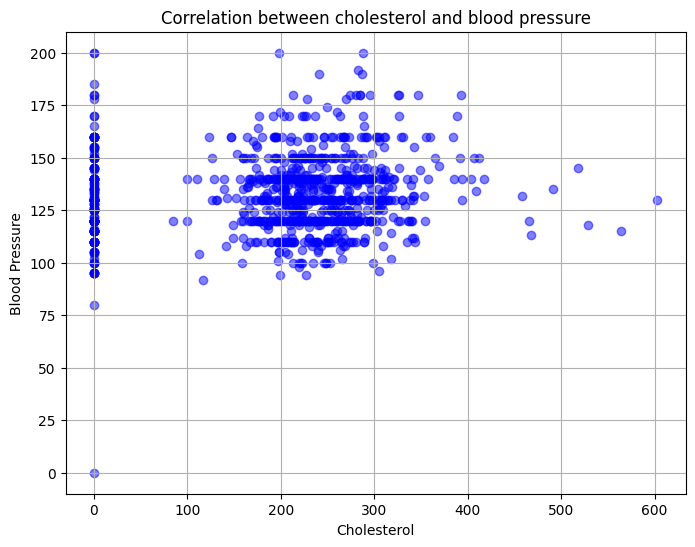

In [ ]:
correlation_df = data[["Cholesterol","RestingBP"]]
correlation = correlation_df["Cholesterol"].corr(correlation_df["RestingBP"])
print(f"Correlation Between Cholesterol and Blood Pressure: {correlation}")
plt.figure(figsize=(8,6))
plt.scatter(correlation_df["Cholesterol"],correlation_df["RestingBP"], color="blue", alpha=0.5)
plt.title("Correlation between cholesterol and blood pressure")
plt.xlabel("Cholesterol")
plt.ylabel("Blood Pressure")
plt.grid(True)
plt.show()

Heart disease cases and most common chest pain type by age group and gender
        F    M ChestPainType       MaxHR
Age                                     
<30     0    0           ATA  177.400000
30-40   4   28           ASY  155.056818
40-50   7   86           ASY  144.757848
50-60  20  202           ASY  134.291339
60-70  18  127           ASY  125.609137
70-80   1   15           ASY  119.500000


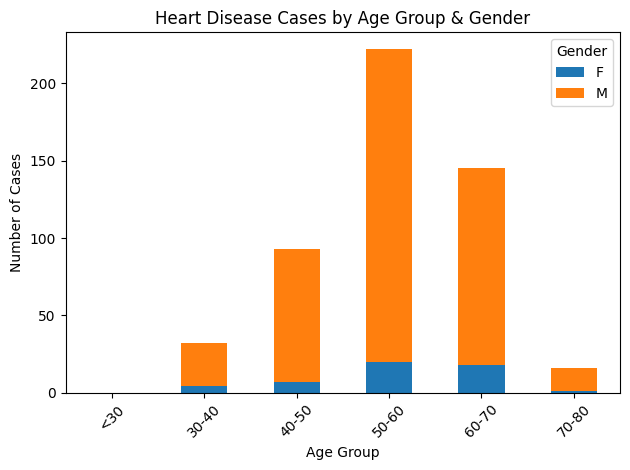

In [ ]:
age_groups = pd.cut(data["Age"], bins= [0,30,40,50,60,70,80], labels= ["<30","30-40","40-50","50-60","60-70","70-80"])
#pd.cut pour découper les âges en intervalles spécifiés par bins et assigne des labels aux groupes d'âge correspondants.
heart_disease_counts = data[data["HeartDisease"]==1].groupby([age_groups,"Sex"]).size().unstack()
#Filtre les données pour ne garder que les cas de maladies cardiaques (HeartDisease==1), puis groupe les données par age_groups et Sex et compte le nombre de cas dans chaque groupe.
#unstack() : Transforme le résultat en un DataFrame avec les sexes comme colonnes et les groupes d'âge comme index.
most_common_chest_pain = data.groupby(age_groups)["ChestPainType"].apply(lambda x: x.mode().iloc[0])
#Groupe les données par age_groups et utilise apply avec une fonction lambda pour trouver le type de douleur thoracique le plus fréquent (mode()) dans chaque groupe d'âge.x.mode().iloc[0] : Prend la première valeur de la mode car il peut y avoir plusieurs modes.
average_hr_by_age = data.groupby(age_groups)["MaxHR"].mean() #Groupe les données par age_groups et calcule la moyenne de la fréquence cardiaque maximale (MaxHR) dans chaque groupe.

print("Heart disease cases and most common chest pain type by age group and gender")
print(pd.concat([heart_disease_counts,most_common_chest_pain,average_hr_by_age], axis=1))

heart_disease_counts.plot(kind="bar", stacked=True)
plt.title("Heart Disease Cases by Age Group & Gender")
plt.xlabel("Age Group")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

Ranked list of features by importances:
           Feature  Importances
10        ST_Slope     0.199776
2    ChestPainType     0.128121
7            MaxHR     0.114418
9          Oldpeak     0.111714
4      Cholesterol     0.106246
8   ExerciseAngina     0.093969
0              Age     0.079532
3        RestingBP     0.075553
1              Sex     0.038377
5        FastingBS     0.026740
6       RestingECG     0.025555


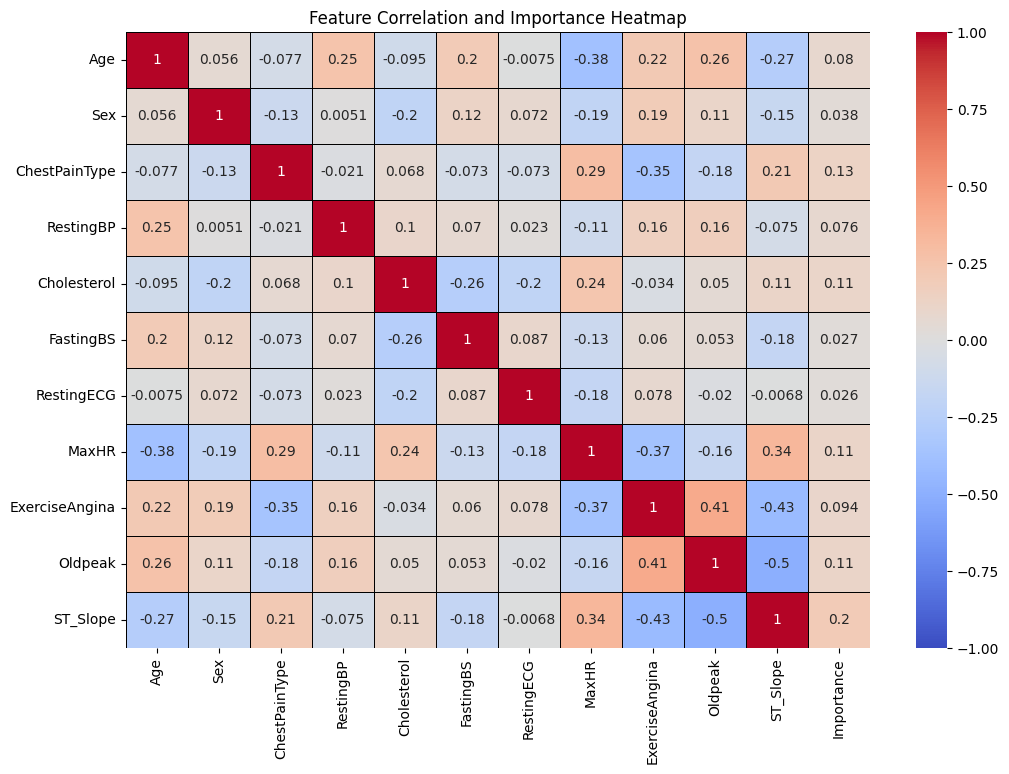

In [ ]:
label_encoder = LabelEncoder()
data["Sex"] = label_encoder.fit_transform(data["Sex"])
data["ChestPainType"] = label_encoder.fit_transform(data["ChestPainType"])
data["RestingECG"] = label_encoder.fit_transform(data["RestingECG"])
data["ExerciseAngina"] = label_encoder.fit_transform(data["ExerciseAngina"])
data["ST_Slope"] = label_encoder.fit_transform(data["ST_Slope"])
X = data.drop("HeartDisease", axis=1)
y = data["HeartDisease"]
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X,y)
feature_importances = rf_classifier.feature_importances_
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importances': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by="Importances", ascending=False)
print("Ranked list of features by importances:")
print(feature_importances_df)
corr_matrix = X.corr()
importances_matrix = pd.DataFrame(corr_matrix)
importances_matrix['Importance'] = feature_importances
plt.figure(figsize=(12,8))
sns.heatmap(importances_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, linewidths=0.5, linecolor="black")
plt.title("Feature Correlation and Importance Heatmap")
plt.show()

In [ ]:
data["Sex"].unique() #unique value that this variable has

array([1, 0])

In [ ]:

X = data.drop("HeartDisease", axis=1)
y = data["HeartDisease"]
categories = {
    'ChestPainType': ['ATA', 'NAP', 'ASY', 'TA'],
    'Sex': ['M', 'F'],
    'RestingECG': ['Normal', 'ST', 'LVH'],
    'ExerciseAngina': ['N', 'Y'],
    'ST_Slope': ['Up', 'Flat', 'Down']
}
X = pd.get_dummies(X, columns=categories.keys())
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
random_data = {
    "Age": np.random.randint(20,80),
    "Sex": np.random.choice(categories["Sex"]),
    "ChestPainType": np.random.choice(categories["ChestPainType"]),
    "RestingBP": np.random.randint(100,200),
    "Cholesterol": np.random.randint(100,300),
    "FastingBS": np.random.choice([0,1]),
    "RestingECG": np.random.choice(categories["RestingECG"]),
    "MaxHR": np.random.randint(60,220),
    "ExerciseAngina": np.random.choice(categories["ExerciseAngina"]),
    "Oldpeak": np.random.uniform(0,5),
    "ST_Slope": np.random.choice(categories["ST_Slope"])
}
random_df = pd.DataFrame([random_data])
random_df = pd.get_dummies(random_df, columns=categories.keys())
missing_features = set(X_train.columns) - set(random_df.columns)
for feature in missing_features:
  random_df[feature] = 0
random_df = random_df[X_train.columns]
random_prediction = rf_classifier.predict(random_df)
def print_features(random_data):
  for feature, value in random_data.items():
    print(f"{feature} = {value}")
print("Randomly Generated Patient Data:")
print_features(random_data)
if random_prediction[0] == 1:
  print("Heart Disease Detected")
else:
  print("Normal")

Randomly Generated Patient Data:
Age = 54
Sex = F
ChestPainType = TA
RestingBP = 143
Cholesterol = 265
FastingBS = 1
RestingECG = ST
MaxHR = 202
ExerciseAngina = Y
Oldpeak = 1.3257246836285752
ST_Slope = Up
Normal


In [ ]:
data["Sex"].unique() #unique value that this variable has

array([1, 0])

In [ ]:

X = data.drop("HeartDisease", axis=1)
y = data["HeartDisease"]
categories = {
    'ChestPainType': ['ATA', 'NAP', 'ASY', 'TA'],
    'Sex': ['M', 'F'],
    'RestingECG': ['Normal', 'ST', 'LVH'],
    'ExerciseAngina': ['N', 'Y'],
    'ST_Slope': ['Up', 'Flat', 'Down']
}
X = pd.get_dummies(X, columns=categories.keys())
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train,y_train)
def get_user_input():
  age = int(input("Enter age:"))
  sex = input("Enter Sex (M/F):").upper()
  chest_pain_type = input("Enter Chest Paint Type (ATA/NAP/ASY/TA):")
  resting_bp = int(input("Enter resting blood pressure:"))
  cholesterol = int(input("Enter choletesrol"))
  fasting_bs = int(input("Enter fasting blood sugar:"))
  resting_ecg = input("Enter Resting ECG (Normal/ST/LVH):")
  max_hr = int(input("Enter max heart rate:"))
  exercise_angina = input("Enter Exercise Angina (N/Y):")
  oldpeak = float(input("Enter Oldpeak:"))
  st_slope = input("Enter ST Slope (Up/Flat/Down)")

  return {
      "Age": age,
      "Sex": sex,
      "ChestPainType": chest_pain_type,
      "RestingBP": resting_bp,
      "Cholesterol": cholesterol,
      "FastingBS": fasting_bs,
      "RestingECG": resting_ecg,
      "MaxHR": max_hr,
      "ExerciseAngina": exercise_angina,
      "Oldpeak": oldpeak,
      "ST_Slope": st_slope
  }

patient_data = get_user_input()
patient_df = pd.DataFrame([patient_data])
patient_df = pd.get_dummies(patient_df, columns=categories.keys())
missing_features = set(X_train.columns) - set(patient_df.columns)
for feature in missing_features:
  patient_df[feature] = 0
patient_df = patient_df[X_train.columns]
prediction = logistic_classifier.predict(patient_df)
if prediction[0] == 1:
  print("Heart Disease Detected")
else:
  print("Normal")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Enter age:30
Enter Sex (M/F):F
Enter Chest Paint Type (ATA/NAP/ASY/TA):ATA
Enter resting blood pressure:130
Enter choletesrol180
Enter fasting blood sugar:0
Enter Resting ECG (Normal/ST/LVH):ST
Enter max heart rate:171
Enter Exercise Angina (N/Y):Y
Enter Oldpeak:1.5
Enter ST Slope (Up/Flat/Down)UP
Normal
